In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Merge Data


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html#scipy.io.arff.loadarff
from scipy.io import arff
import os
import pandas as pd

multiclass_path = "/content/drive/MyDrive/csi_5170/project/multiclass/"
multiclass_files = sorted(os.listdir(multiclass_path))

print("loading " + multiclass_files[0])
data, meta = arff.loadarff(multiclass_path + multiclass_files[0])
df1 = pd.DataFrame(data)

for i in range(1, len(multiclass_files)):
  print("loading " + multiclass_files[i])
  data, meta=arff.loadarff(multiclass_path + multiclass_files[i])
  df2 = pd.DataFrame(data)
  df1 = pd.concat([df1, df2], ignore_index=True)

df1 = df1.rename(columns={"marker":"scenario"})
df1['scenario'] = df1['scenario'].str.decode('ascii')

print(df1)
print(df1.columns)
print(df1.shape)
print(df1.head())

loading data1 Sampled Scenarios.csv.arff
loading data10 Sampled Scenarios.csv.arff
loading data11 Sampled Scenarios.csv.arff
loading data12 Sampled Scenarios.csv.arff
loading data13 Sampled Scenarios.csv.arff
loading data14 Sampled Scenarios.csv.arff
loading data15 Sampled Scenarios.csv.arff
loading data2 Sampled Scenarios.csv.arff
loading data3 Sampled Scenarios.csv.arff
loading data4 Sampled Scenarios.csv.arff
loading data5 Sampled Scenarios.csv.arff
loading data6 Sampled Scenarios.csv.arff
loading data7 Sampled Scenarios.csv.arff
loading data8 Sampled Scenarios.csv.arff
loading data9 Sampled Scenarios.csv.arff
       R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556

In [ ]:
triclass_path = "/content/drive/MyDrive/csi_5170/project/triple/"
triclass_files = sorted(os.listdir(triclass_path))

print("loading " + triclass_files[0])
df3 = pd.read_csv(triclass_path + triclass_files[0])

for i in range(1, len(triclass_files)):
  print("loading " + triclass_files[i])
  df2 = pd.read_csv(triclass_path + triclass_files[i])
  df3 = pd.concat([df3, df2], ignore_index=True)

print(df3)
print(df3.columns)
print(df3.shape)
print(df3.head())

loading data1.csv
loading data10.csv
loading data11.csv
loading data12.csv
loading data13.csv
loading data14.csv
loading data15.csv
loading data2.csv
loading data3.csv
loading data4.csv
loading data5.csv
loading data6.csv
loading data7.csv
loading data8.csv
loading data9.csv
       R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108

In [ ]:
# # df1 = df1.merge(df3)
# print(df1['R1-PA:Z'][2302])
# print(df3['R1-PA:Z'][2302])
# print(df1.head)
# print(df3.head)

In [ ]:
print(multiclass_files)
print(triclass_files)

['data1 Sampled Scenarios.csv.arff', 'data10 Sampled Scenarios.csv.arff', 'data11 Sampled Scenarios.csv.arff', 'data12 Sampled Scenarios.csv.arff', 'data13 Sampled Scenarios.csv.arff', 'data14 Sampled Scenarios.csv.arff', 'data15 Sampled Scenarios.csv.arff', 'data2 Sampled Scenarios.csv.arff', 'data3 Sampled Scenarios.csv.arff', 'data4 Sampled Scenarios.csv.arff', 'data5 Sampled Scenarios.csv.arff', 'data6 Sampled Scenarios.csv.arff', 'data7 Sampled Scenarios.csv.arff', 'data8 Sampled Scenarios.csv.arff', 'data9 Sampled Scenarios.csv.arff']
['data1.csv', 'data10.csv', 'data11.csv', 'data12.csv', 'data13.csv', 'data14.csv', 'data15.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv', 'data6.csv', 'data7.csv', 'data8.csv', 'data9.csv']


# Drop Columns

In [ ]:
print(df1.shape)
df1 = df1.drop(['R1-PA:Z','R2-PA:Z','R3-PA:Z','R4-PA:Z'], axis=1)
# df1['scenario'] = df1['scenario'].str.decode('ascii')
# print(df1.shape)
# print(df3.columns)
# print(df3['R1-PA:Z'])
# print(np.unique_counts(df3['R1-PA:Z']))
df3 = df3.drop(['R1-PA:Z','R2-PA:Z','R3-PA:Z','R4-PA:Z'], axis=1)
# df3['marker'] = df3['marker'].str.decode('ascii')
df = df1.combine_first(df3)
# df = df3.combine_first(df1)
# df = df3
# print(df.shape)
# print(df.head)

(78377, 129)


In [ ]:
X = df.drop(['marker','scenario'], axis=1)
# X = df.drop('marker', axis=1)
y = df[['marker','scenario']]
# X = df3.drop('marker', axis=1)
# y = df3['marker']
print(y)

# y_detail = df['scenario']
print(X.shape)
print(y.shape)
# print(y_detail.shape)

         marker scenario
0      NoEvents       41
1      NoEvents       41
2      NoEvents       41
3      NoEvents       41
4      NoEvents       41
...         ...      ...
78372   Natural        1
78373   Natural        1
78374   Natural        1
78375   Natural        1
78376   Natural        1

[78377 rows x 2 columns]
(78377, 124)
(78377, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['marker'], test_size=0.2, random_state=42)
X_train_detail, X_test_detail, y_train_detail, y_test_detail = train_test_split(X, y['scenario'], test_size=0.2, random_state=42)
print(X_train)
print(y_train)

       R1-PA10:IH  R1-PA11:IH  R1-PA12:IH   R1-PA1:VH   R1-PA2:VH   R1-PA3:VH  \
58511   55.622743    0.000000    0.000000   58.361481  -61.633070  178.390410   
21729   48.586821    0.000000    0.000000   46.294990  -73.705291  166.295271   
59697 -115.943739    0.000000    0.000000 -116.631289  123.392191    3.380451   
55017 -119.845582    0.000000    0.000000 -118.453295  121.564455    1.564175   
64492   20.036334    0.000000    0.000000   22.471405  -97.488769  142.506063   
...           ...         ...         ...         ...         ...         ...   
6265   -92.721760    0.000000    0.000000  -87.164069  152.865140   32.859130   
54886  -19.933202   35.689541  165.017575  -21.520295 -141.497657   98.497175   
76820    7.391156   66.394349 -165.200921    3.082513 -116.900579  123.111441   
860    -18.483618   41.573818  163.516425  -23.726182 -143.715004   96.297017   
15795  138.145854 -162.141326  -27.295709  136.335307   16.363675 -103.613688   

        R1-PA4:IH   R1-PA5:

In [ ]:
import numpy as np
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)
print(np.unique_counts(y_train))

(62701, 124)
(62701,)
(15676, 124)
(15676,)
58511      Attack
21729      Attack
59697      Attack
55017      Attack
64492      Attack
           ...   
6265       Attack
54886      Attack
76820      Attack
860        Attack
15795    NoEvents
Name: marker, Length: 62701, dtype: object
UniqueCountsResult(values=array(['Attack', 'Natural', 'NoEvents'], dtype=object), counts=array([44494, 14655,  3552]))


In [ ]:
print(X_train)

       R1-PA10:IH  R1-PA11:IH  R1-PA12:IH   R1-PA1:VH   R1-PA2:VH   R1-PA3:VH  \
58511   55.622743    0.000000    0.000000   58.361481  -61.633070  178.390410   
21729   48.586821    0.000000    0.000000   46.294990  -73.705291  166.295271   
59697 -115.943739    0.000000    0.000000 -116.631289  123.392191    3.380451   
55017 -119.845582    0.000000    0.000000 -118.453295  121.564455    1.564175   
64492   20.036334    0.000000    0.000000   22.471405  -97.488769  142.506063   
...           ...         ...         ...         ...         ...         ...   
6265   -92.721760    0.000000    0.000000  -87.164069  152.865140   32.859130   
54886  -19.933202   35.689541  165.017575  -21.520295 -141.497657   98.497175   
76820    7.391156   66.394349 -165.200921    3.082513 -116.900579  123.111441   
860    -18.483618   41.573818  163.516425  -23.726182 -143.715004   96.297017   
15795  138.145854 -162.141326  -27.295709  136.335307   16.363675 -103.613688   

        R1-PA4:IH   R1-PA5:

In [ ]:
# normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# oversample
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(133482, 124)
(133482,)


In [ ]:
print(X_train)

[[ 0.7036786   0.02778312 -0.08593584 ... -0.00798742 -0.00893028
  -0.00893028]
 [ 0.63303258  0.02778312 -0.08593584 ... -0.00798742 -0.00893028
  -0.00893028]
 [-1.01897955  0.02778312 -0.08593584 ... -0.00798742 -0.00893028
  -0.00893028]
 ...
 [ 1.27828364  2.45584288 -0.8241002  ... -0.00798742 -0.00893028
  -0.00893028]
 [-1.31825027 -1.32918604  0.59743391 ... -0.00798742 -0.00893028
  -0.00893028]
 [ 0.22089397  0.02778312 -0.08593584 ... -0.00798742 -0.00893028
  -0.00893028]]


In [ ]:
natural=['1','2','3','4','5','6']
no_event=['41']
data_injection=['7','8','9','10','11','12']
remote_tripping=['15','16','17','18', '19','20']
relay_setting_change=['21','22','23','24','25','26','27','28','29','30','35','36','37','38','39','40']

              precision    recall  f1-score   support

      Attack       0.94      0.94      0.94     11169
     Natural       0.83      0.80      0.81      3654
    NoEvents       0.95      0.98      0.97       853

    accuracy                           0.91     15676
   macro avg       0.90      0.91      0.91     15676
weighted avg       0.91      0.91      0.91     15676

[[10532   605    32]
 [  714  2927    13]
 [    8     6   839]]
              precision    recall  f1-score   support

           1       0.75      0.76      0.76       316
          10       0.85      0.81      0.83       341
          11       0.88      0.81      0.84       382
          12       0.84      0.83      0.84       384
          13       0.78      0.75      0.77       284
          14       0.74      0.79      0.77       355
          15       0.79      0.80      0.80       276
          16       0.84      0.74      0.79       269
          17       0.78      0.78      0.78       258
          18  

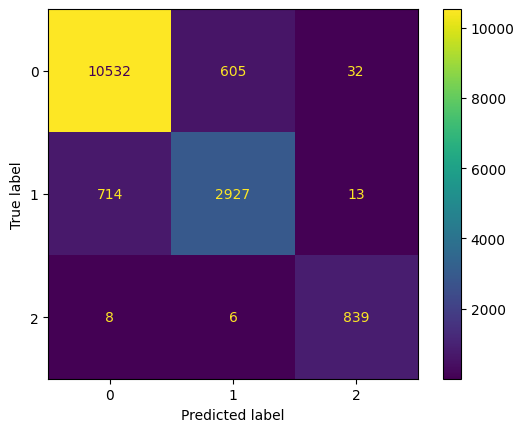

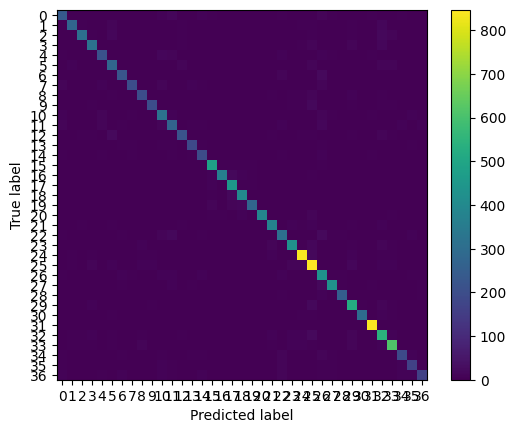

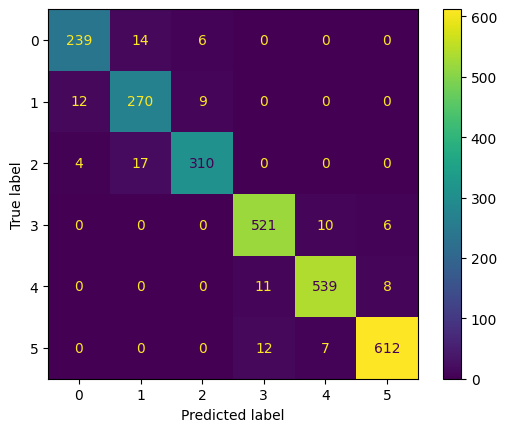

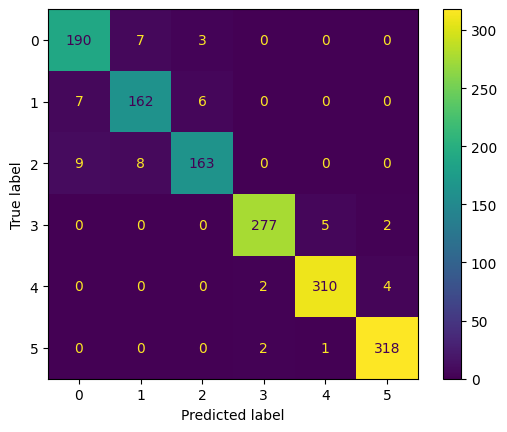

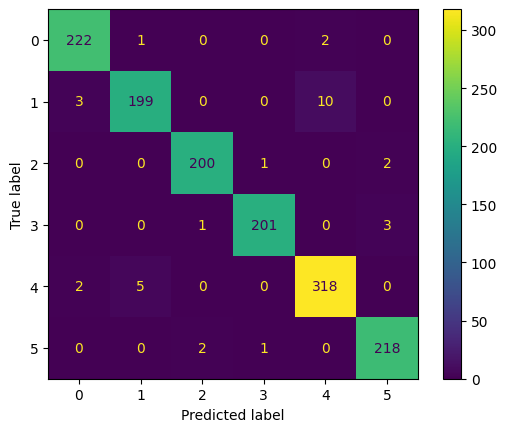

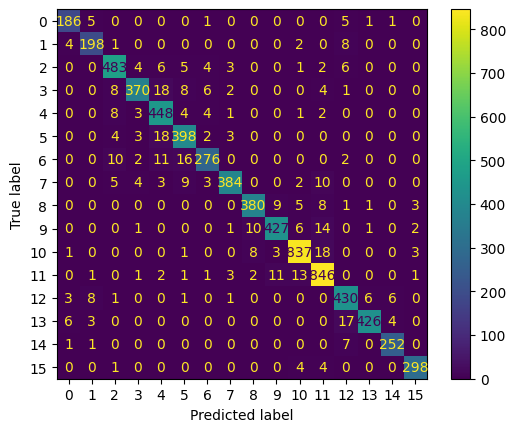

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.83      0.04      0.07     11169
     Natural       0.32      0.12      0.18      3654
    NoEvents       0.06      1.00      0.12       853

    accuracy                           0.11     15676
   macro avg       0.40      0.38      0.12     15676
weighted avg       0.67      0.11      0.10     15676

[[ 409  940 9820]
 [  81  441 3132]
 [   0    3  850]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       316
          10       0.00      0.00      0.00       341
          11       0.00      0.00      0.00       382
          12       0.00      0.00      0.00       384
          13       0.07      0.12      0.09       284
          14       0.05      0.01      0.01       355
          15       0.04      0.03      0.03       276
          16       0.03      0.01      0.02       269
          17       0.17      0.03      0.05       258
          18       0.05      0.09      0.07       269
          19       0.06      0.00      0.00       392
           2       0.00      0.00      0.00       368
          20       0.15      0.05      0.07       300
          21       0.10      0.03      0.05       234
          22       0.29      0.02      0.03       254
          23       0.00      0.00      0.00       526
          24       0.00      0.00      0.00       423
          25       0.45    

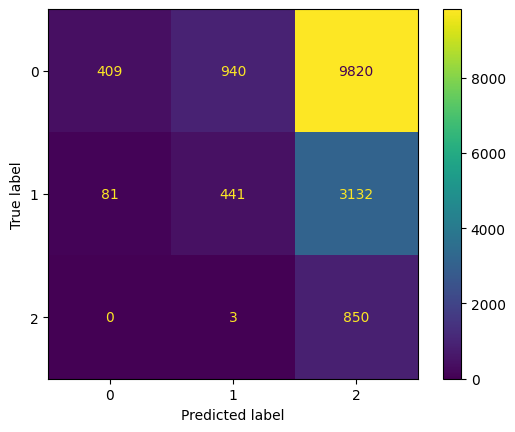

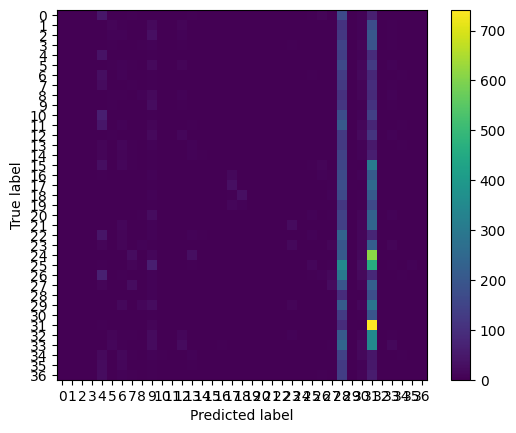

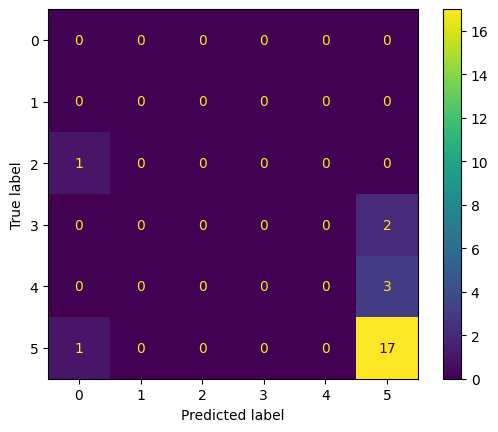

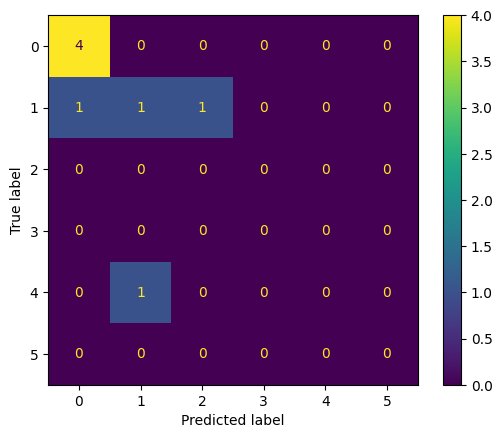

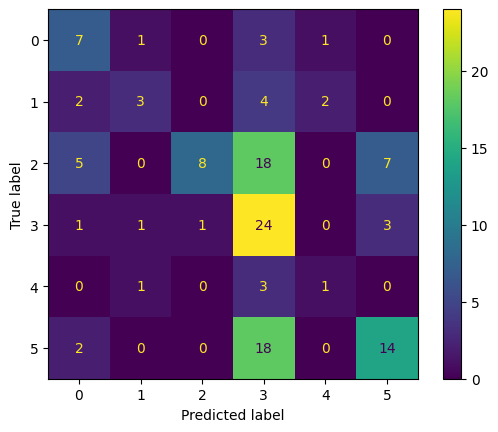

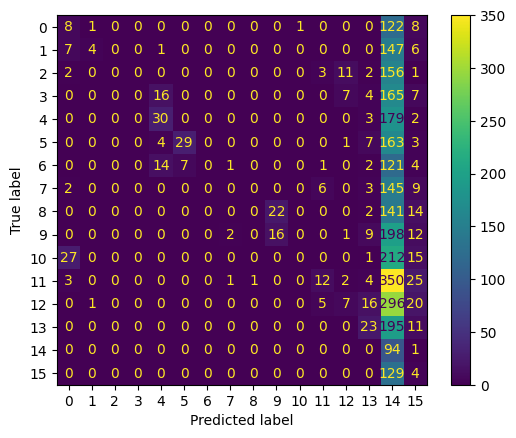

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = GaussianNB()
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()
print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.83      0.04      0.07     11169
     Natural       0.32      0.12      0.18      3654
    NoEvents       0.06      1.00      0.12       853

    accuracy                           0.11     15676
   macro avg       0.40      0.38      0.12     15676
weighted avg       0.67      0.11      0.10     15676

[[ 409  940 9820]
 [  81  441 3132]
 [   0    3  850]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.13      0.03      0.04       316
          10       0.00      0.00      0.00       341
          11       0.00      0.00      0.00       382
          12       0.00      0.00      0.00       384
          13       0.06      0.07      0.07       284
          14       0.10      0.02      0.03       355
          15       0.22      0.03      0.06       276
          16       0.04      0.05      0.04       269
          17       0.11      0.09      0.10       258
          18       0.03      0.05      0.04       269
          19       0.13      0.06      0.08       392
           2       0.00      0.00      0.00       368
          20       0.17      0.06      0.09       300
          21       0.12      0.04      0.06       234
          22       0.11      0.00      0.01       254
          23       0.00      0.00      0.00       526
          24       0.00      0.00      0.00       423
          25       0.44    

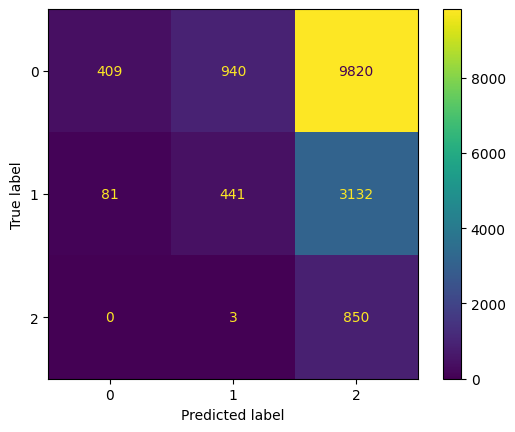

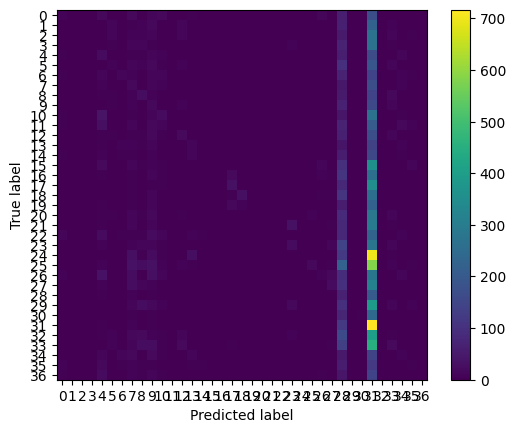

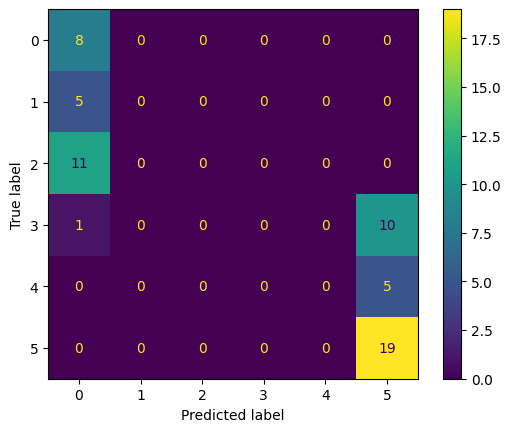

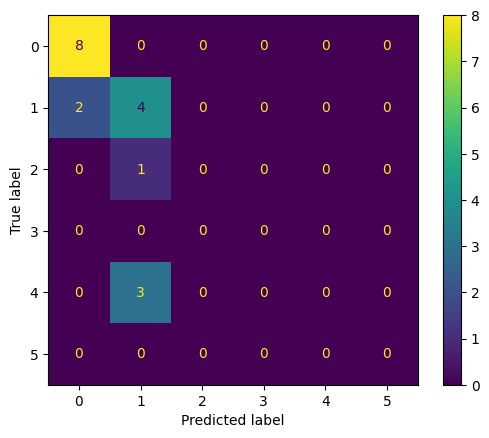

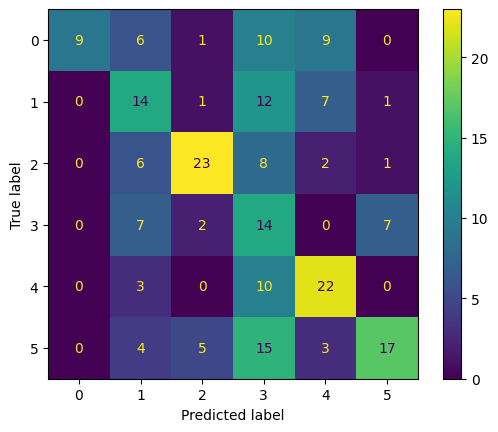

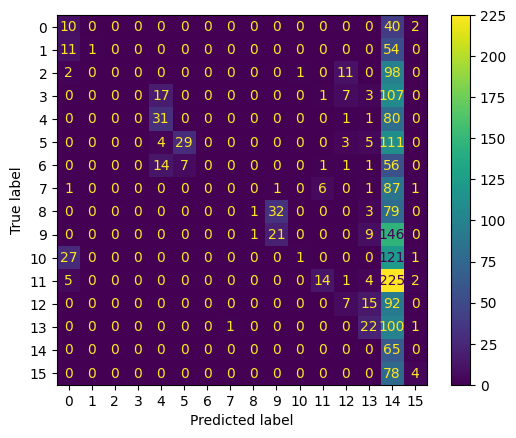

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = GaussianNB(var_smoothing=3.0733078117508066e-05)
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

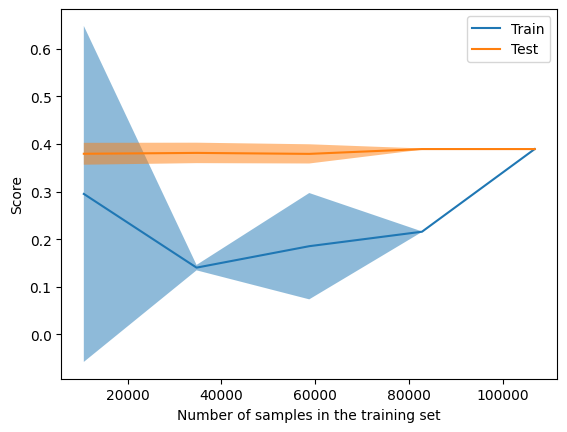

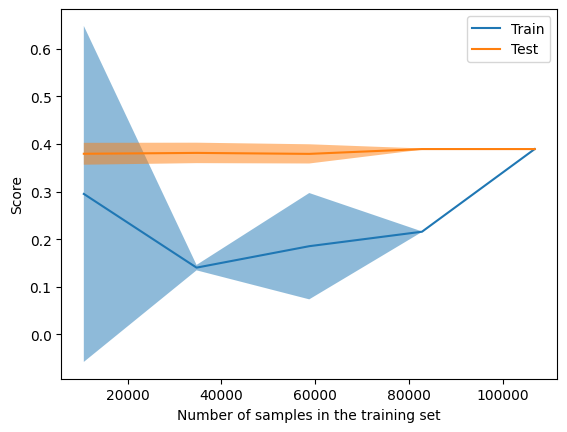

In [ ]:
from sklearn.model_selection import validation_curve, ValidationCurveDisplay, learning_curve, LearningCurveDisplay
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
training_display.plot()

In [ ]:
# from sklearn.model_selection import validation_curve, ValidationCurveDisplay, learning_curve, LearningCurveDisplay
# import matplotlib.pyplot as plt
# import numpy as np # Import numpy
# from sklearn.naive_bayes import GaussianNB # Import GaussianNB

# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from scipy.stats import loguniform

# param_name='var_smoothing'
# # Generate an array of values for param_range
# param_range = np.logspace(-15, -2, 50) # 50 points between 1e-15 and 1e-2

# clf = GaussianNB() # Re-initialize clf as GaussianNB
# train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name=param_name, param_range=param_range)
# validation_display = ValidationCurveDisplay(
#     train_scores=train_scores,
#     param_name=param_name,
#     param_range=param_range,
#     test_scores=test_scores
#     )
# validation_display.plot()

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from scipy.stats import loguniform

# param_distributions = {
#     'var_smoothing': loguniform(1e-15, 1e-2)
# }
# skf = StratifiedKFold()
# clf_1_optimizer = RandomizedSearchCV(clf, param_distributions, cv=skf)
# search = clf_1_optimizer.fit(X_train, y_train)
# search.best_params_

              precision    recall  f1-score   support

      Attack       0.88      0.84      0.86     11169
     Natural       0.59      0.66      0.62      3654
    NoEvents       0.81      0.91      0.86       853

    accuracy                           0.80     15676
   macro avg       0.76      0.80      0.78     15676
weighted avg       0.81      0.80      0.81     15676

[[9392 1631  146]
 [1216 2405   33]
 [  61   17  775]]
              precision    recall  f1-score   support

           1       0.63      0.60      0.62       316
          10       0.71      0.73      0.72       341
          11       0.70      0.74      0.72       382
          12       0.75      0.73      0.74       384
          13       0.56      0.56      0.56       284
          14       0.65      0.67      0.66       355
          15       0.61      0.61      0.61       276
          16       0.63      0.62      0.63       269
          17       0.73      0.72      0.72       258
          18       0.65

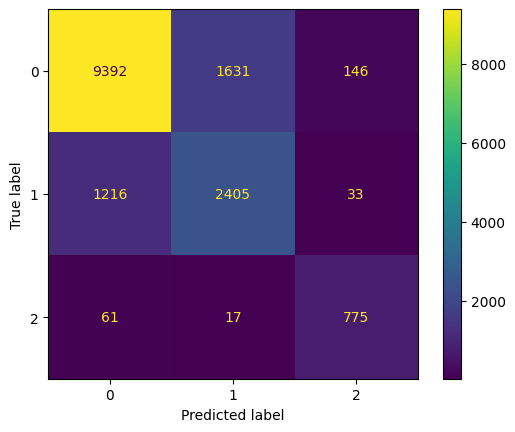

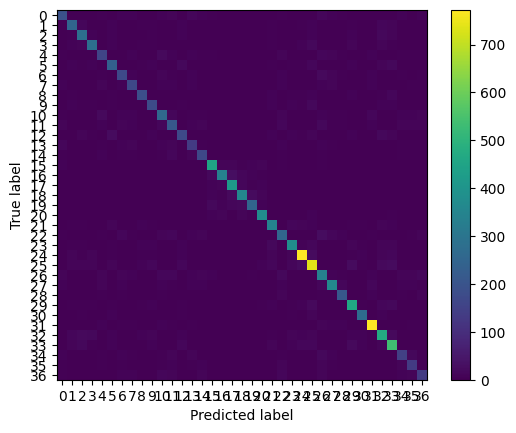

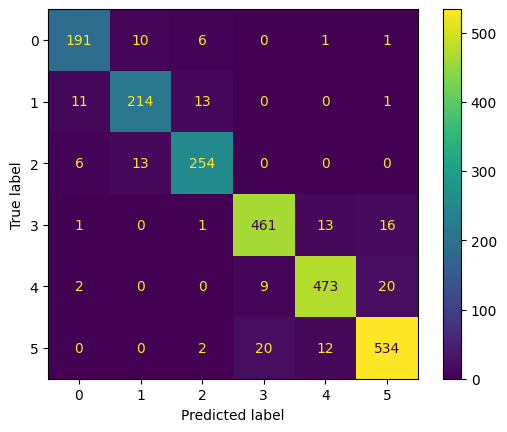

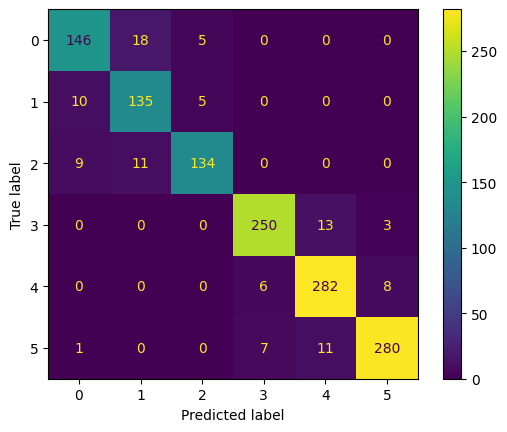

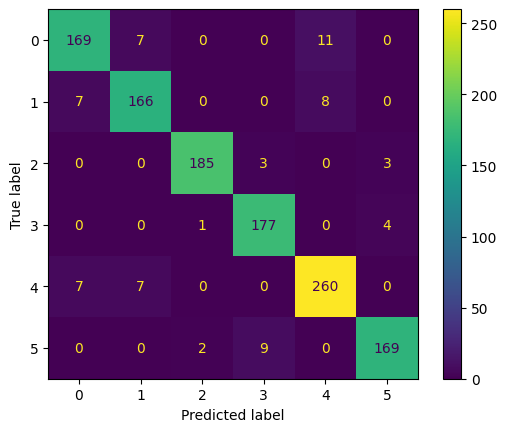

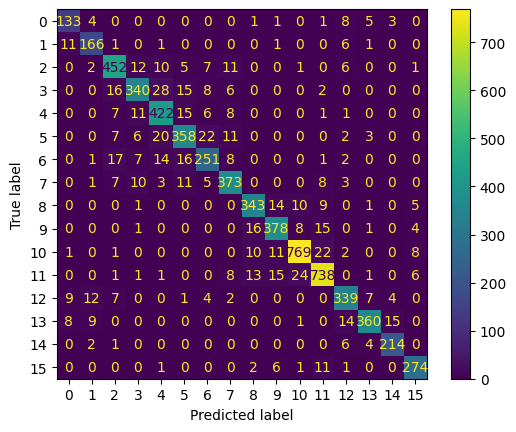

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time
from sklearn.model_selection import validation_curve, ValidationCurveDisplay, learning_curve, LearningCurveDisplay
import matplotlib.pyplot as plt

basic_start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.83      0.59      0.69     11169
     Natural       0.36      0.51      0.42      3654
    NoEvents       0.33      0.94      0.48       853

    accuracy                           0.59     15676
   macro avg       0.50      0.68      0.53     15676
weighted avg       0.69      0.59      0.61     15676

[[6565 3339 1265]
 [1377 1877  400]
 [  14   33  806]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       316
          10       0.00      0.00      0.00       341
          11       0.00      0.00      0.00       382
          12       0.00      0.00      0.00       384
          13       0.00      0.00      0.00       284
          14       0.00      0.00      0.00       355
          15       0.75      0.03      0.06       276
          16       0.00      0.00      0.00       269
          17       0.00      0.00      0.00       258
          18       0.00      0.00      0.00       269
          19       0.00      0.00      0.00       392
           2       0.00      0.00      0.00       368
          20       0.00      0.00      0.00       300
          21       0.00      0.00      0.00       234
          22       0.00      0.00      0.00       254
          23       0.24      0.02      0.03       526
          24       0.00      0.00      0.00       423
          25       0.30    

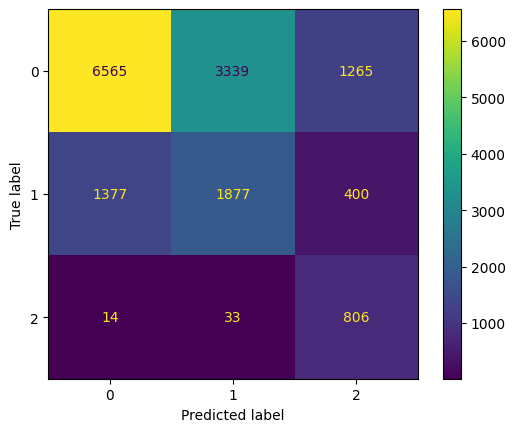

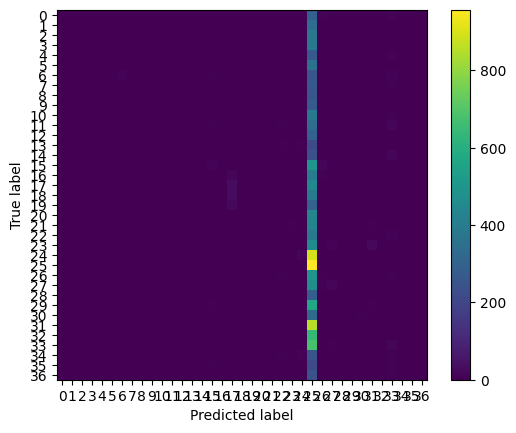

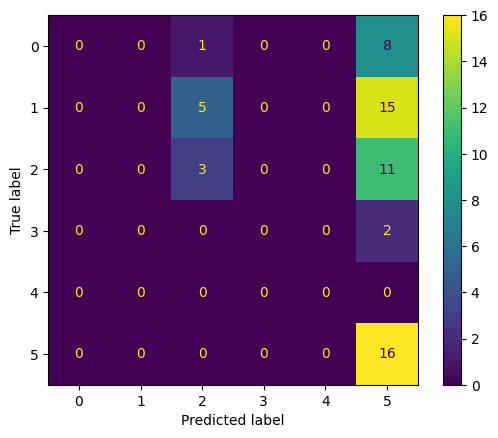

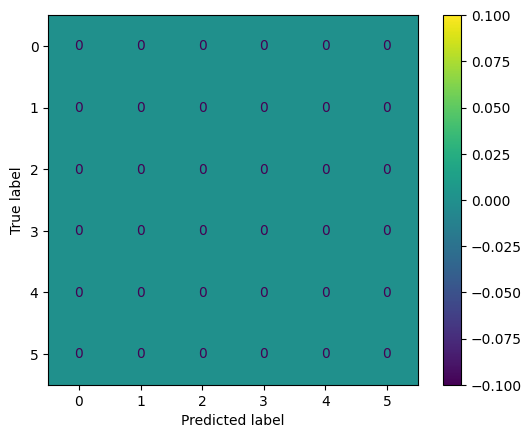

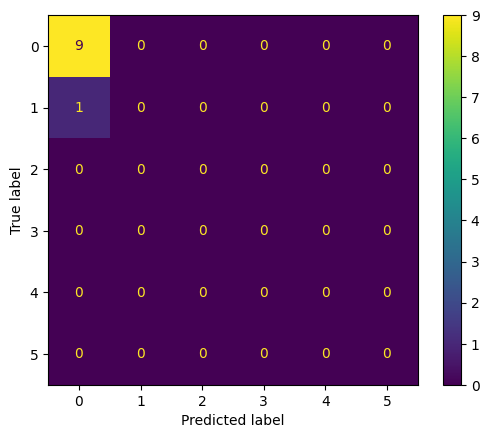

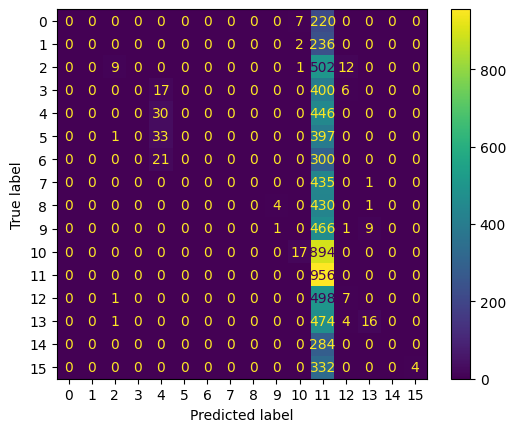

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = SVC(decision_function_shape='ovo')
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.95      0.32      0.48     11169
     Natural       0.32      0.77      0.46      3654
    NoEvents       0.25      0.95      0.39       853

    accuracy                           0.46     15676
   macro avg       0.51      0.68      0.44     15676
weighted avg       0.76      0.46      0.47     15676

[[3543 5811 1815]
 [ 194 2807  653]
 [   5   37  811]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.43      0.06      0.11       316
          10       0.00      0.00      0.00       341
          11       0.00      0.00      0.00       382
          12       0.00      0.00      0.00       384
          13       0.08      0.00      0.01       284
          14       0.00      0.00      0.00       355
          15       0.15      0.05      0.07       276
          16       0.19      0.04      0.07       269
          17       1.00      0.02      0.03       258
          18       0.50      0.01      0.01       269
          19       0.10      0.07      0.08       392
           2       0.14      0.02      0.04       368
          20       0.00      0.00      0.00       300
          21       0.31      0.08      0.13       234
          22       0.28      0.04      0.07       254
          23       0.29      0.52      0.37       526
          24       0.30      0.16      0.21       423
          25       0.25    

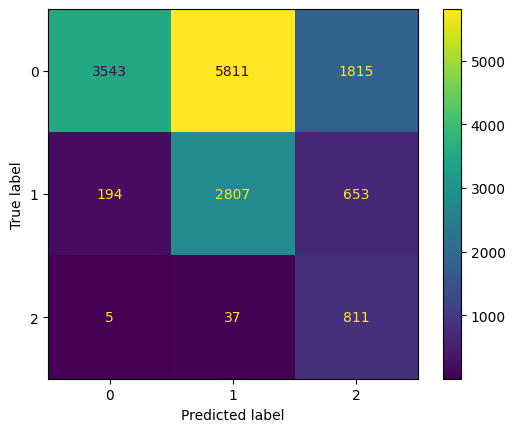

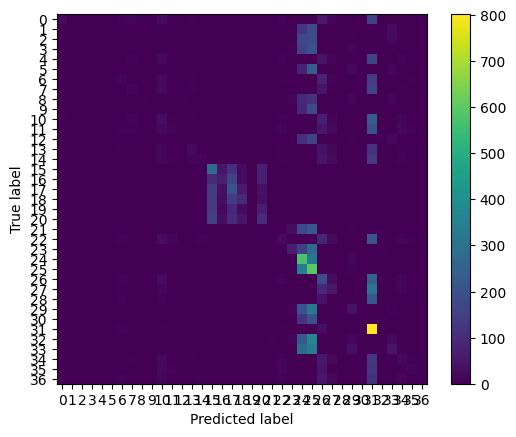

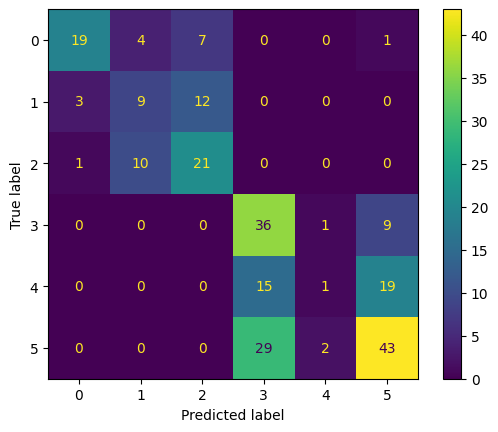

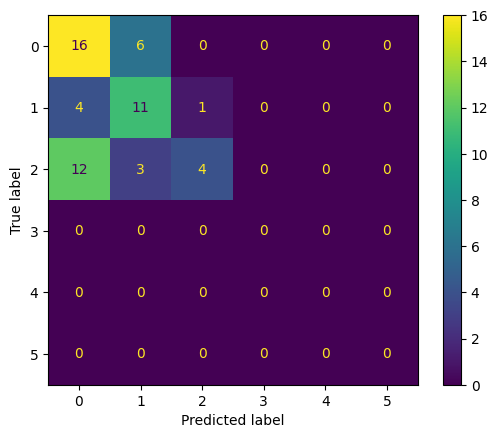

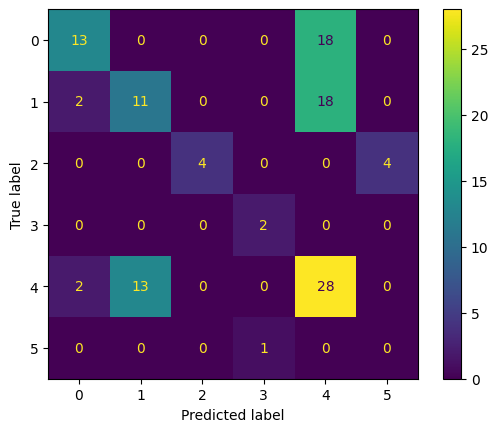

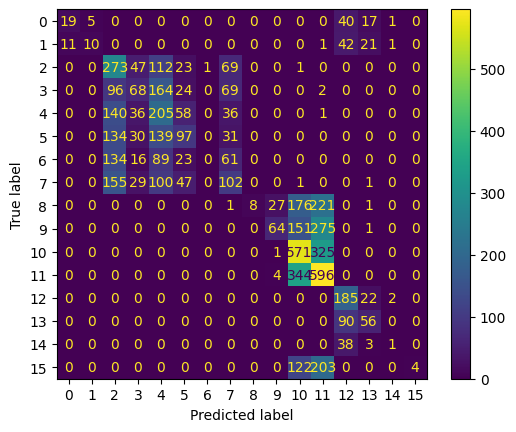

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = LinearSVC()
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.95      0.32      0.48     11169
     Natural       0.32      0.77      0.46      3654
    NoEvents       0.25      0.95      0.39       853

    accuracy                           0.46     15676
   macro avg       0.51      0.68      0.44     15676
weighted avg       0.76      0.46      0.47     15676

[[3543 5811 1815]
 [ 194 2807  653]
 [   5   37  811]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.43      0.06      0.11       316
          10       0.00      0.00      0.00       341
          11       0.00      0.00      0.00       382
          12       0.00      0.00      0.00       384
          13       0.08      0.00      0.01       284
          14       0.00      0.00      0.00       355
          15       0.15      0.05      0.07       276
          16       0.19      0.04      0.07       269
          17       1.00      0.02      0.03       258
          18       0.50      0.01      0.01       269
          19       0.10      0.07      0.08       392
           2       0.14      0.02      0.04       368
          20       0.00      0.00      0.00       300
          21       0.31      0.08      0.13       234
          22       0.28      0.04      0.07       254
          23       0.29      0.52      0.37       526
          24       0.30      0.16      0.21       423
          25       0.25    

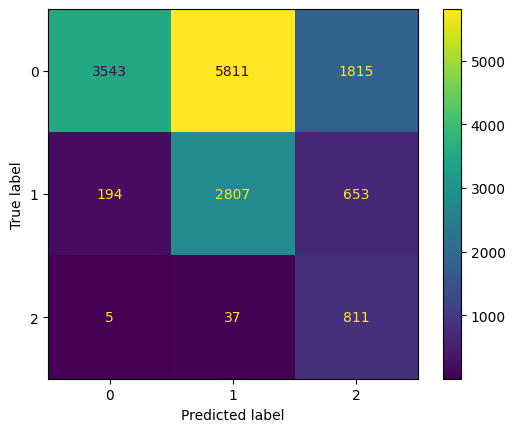

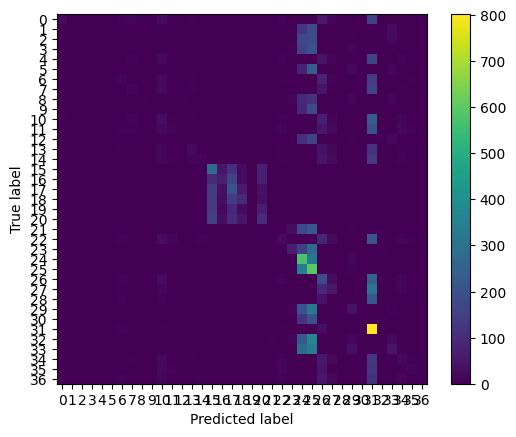

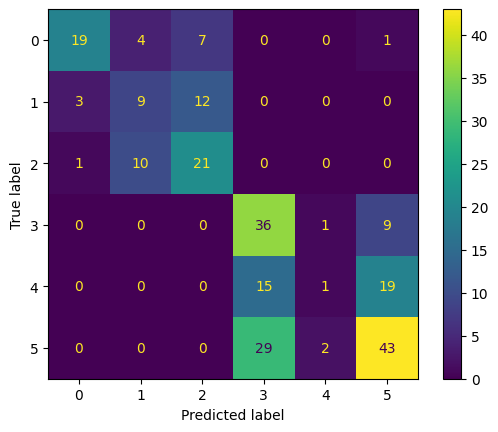

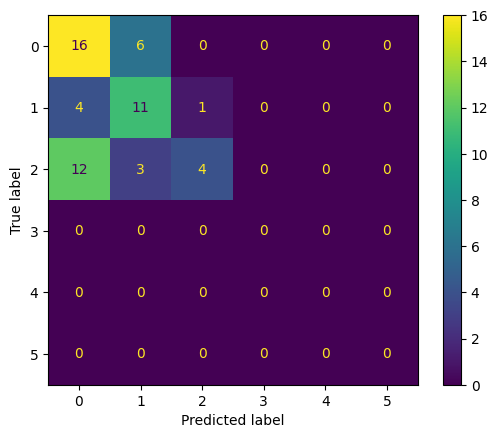

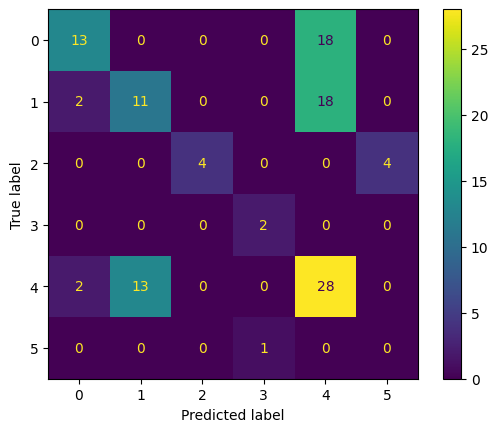

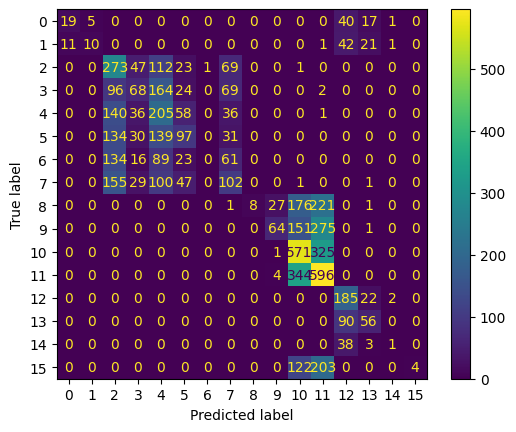

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

clf = LinearSVC(penalty='l2', loss='squared_hinge', C=1.0)
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from scipy.stats import uniform

# param_distributions = {
#     'penalty': ['l1', 'l2'],
#     'loss': ['hinge', 'squared_hinge'],
#     'C':[0.001, 0.01, 0.1, 1.0]
# }
# skf = StratifiedKFold()
# clf_1_optimizer = RandomizedSearchCV(clf, param_distributions, cv=skf)
# search = clf_1_optimizer.fit(X_train, y_train)
# search.best_params_

              precision    recall  f1-score   support

      Attack       0.94      0.82      0.88     11169
     Natural       0.63      0.84      0.72      3654
    NoEvents       0.77      0.95      0.85       853

    accuracy                           0.83     15676
   macro avg       0.78      0.87      0.82     15676
weighted avg       0.86      0.83      0.84     15676

[[9171 1791  207]
 [ 547 3070   37]
 [  17   27  809]]
              precision    recall  f1-score   support

           1       0.24      0.38      0.29       316
          10       0.43      0.62      0.51       341
          11       0.49      0.63      0.55       382
          12       0.50      0.58      0.54       384
          13       0.34      0.48      0.40       284
          14       0.36      0.41      0.39       355
          15       0.37      0.49      0.42       276
          16       0.35      0.44      0.39       269
          17       0.38      0.45      0.41       258
          18       0.52

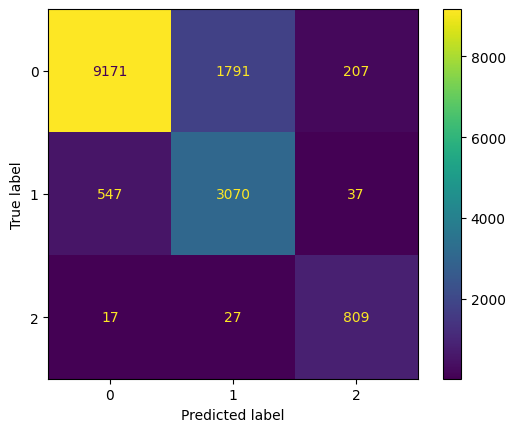

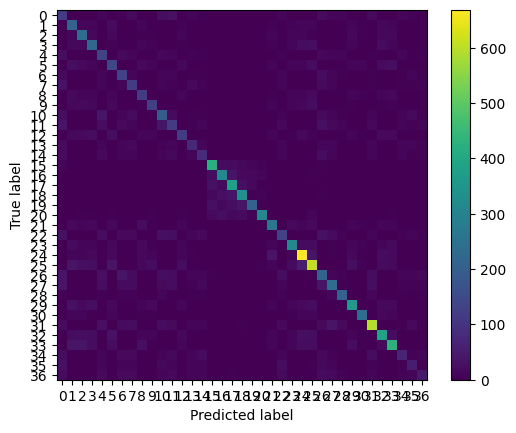

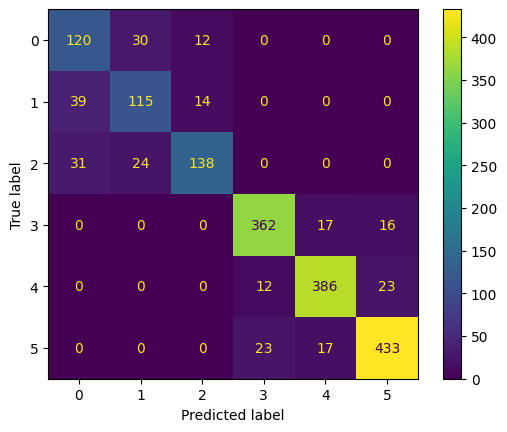

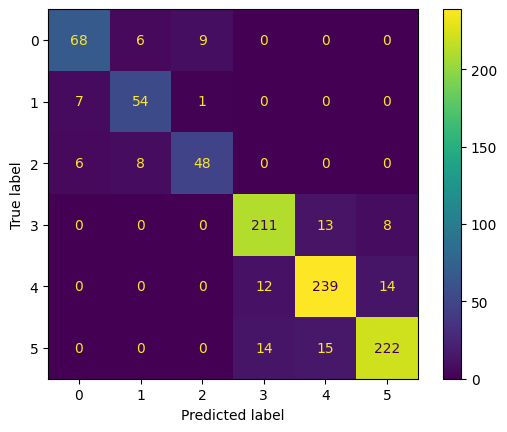

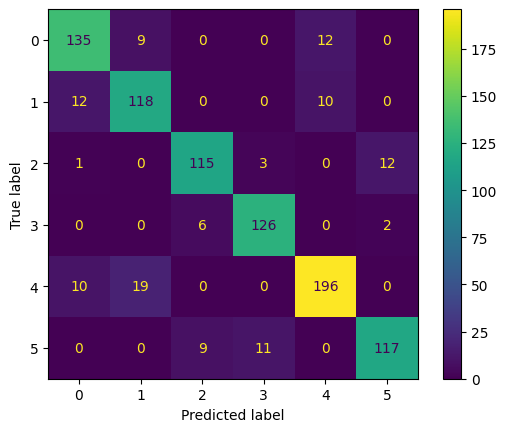

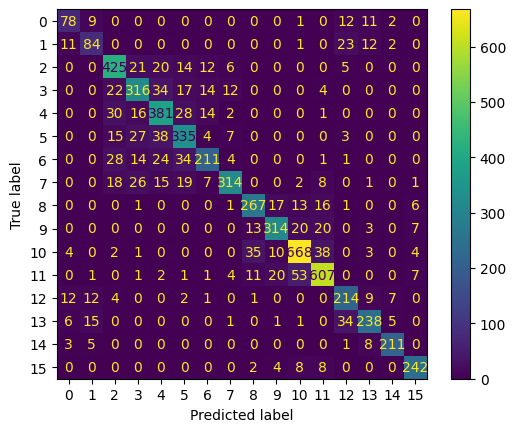

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

detail_start_time = time.time()
clf = KNeighborsClassifier()
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

              precision    recall  f1-score   support

      Attack       0.94      0.82      0.88     11169
     Natural       0.63      0.84      0.72      3654
    NoEvents       0.77      0.95      0.85       853

    accuracy                           0.83     15676
   macro avg       0.78      0.87      0.82     15676
weighted avg       0.86      0.83      0.84     15676

[[9171 1791  207]
 [ 547 3070   37]
 [  17   27  809]]
              precision    recall  f1-score   support

           1       0.47      0.48      0.47       316
          10       0.66      0.68      0.67       341
          11       0.64      0.68      0.66       382
          12       0.65      0.67      0.66       384
          13       0.53      0.53      0.53       284
          14       0.60      0.60      0.60       355
          15       0.55      0.59      0.57       276
          16       0.55      0.51      0.53       269
          17       0.51      0.53      0.52       258
          18       0.61

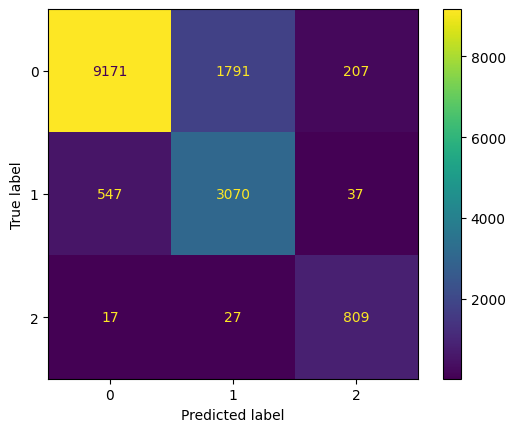

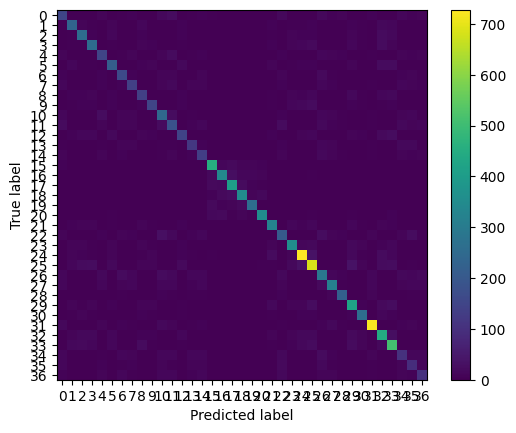

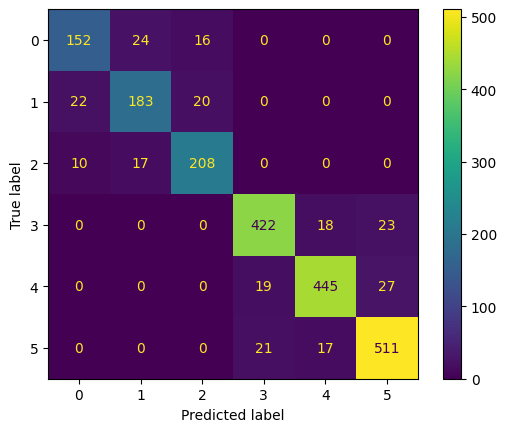

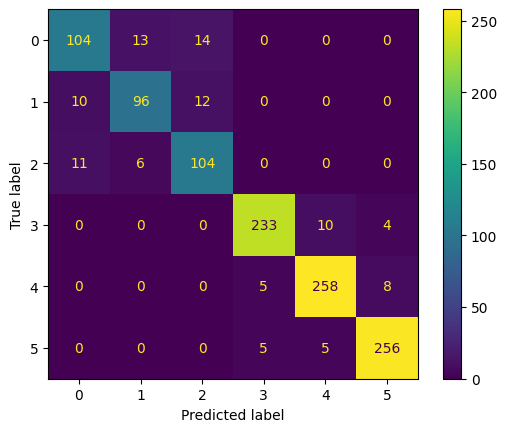

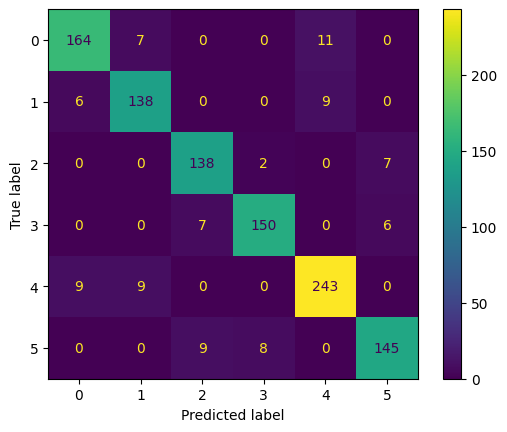

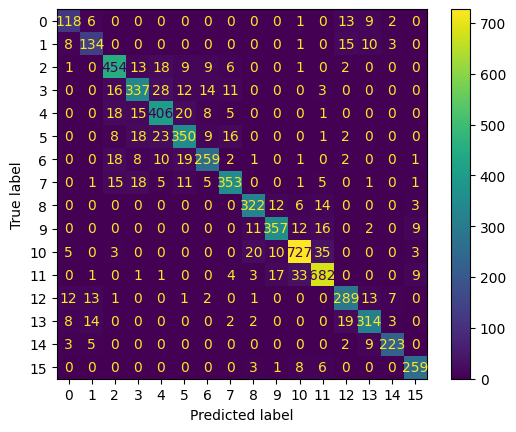

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import time

basic_start_time = time.time()
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
basic_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train, y_train, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


detail_start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=2,weights='distance')
clf.fit(X_train_detail, y_train_detail)
y_pred_detail = clf.predict(X_test_detail)
detail_stop_time = time.time()

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train_detail, y_train_detail)
# training_display = LearningCurveDisplay.from_estimator(clf, X_train_detail, y_train_detail, train_sizes=train_sizes)
# training_display.plot()

print(classification_report(y_test_detail, y_pred_detail))

cm_detail = confusion_matrix(y_test_detail, y_pred_detail)
print(cm_detail)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_detail)
disp.plot(include_values=False)

cm_natural = confusion_matrix(y_test_detail, y_pred_detail, labels=natural)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_natural)
disp.plot()

cm_data_injection = confusion_matrix(y_test_detail, y_pred_detail, labels=data_injection)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data_injection)
disp.plot()

cm_remote_tripping = confusion_matrix(y_test_detail, y_pred_detail, labels=remote_tripping)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remote_tripping)
disp.plot()

cm_relay_setting_change = confusion_matrix(y_test_detail, y_pred_detail, labels=relay_setting_change)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relay_setting_change)
disp.plot()

print("basic time: " + str(basic_stop_time - basic_start_time))
print("detail time: " + str(detail_stop_time - detail_start_time))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from scipy.stats import uniform

# param_distributions = {
#     'n_neighbors': range(1, 20),
#     'weights': ['uniform', 'distance']
# }

# skf = StratifiedKFold()
# clf_1_optimizer = RandomizedSearchCV(clf, param_distributions, cv=skf)
# search = clf_1_optimizer.fit(X_train, y_train)
# search.best_params_